## powered flight trajectory algorithm

In [26]:
import numpy as np 
import matplotlib.pyplot as plt

# measured parameters
mi = 10 # initial mass in kg (both structure + fuel)
mf = 7.5 # final mass in kg (fuel exhausted) 
isp = 200 # specific impulse in sec
m_dot = 0.1 # mass flow rate in kg per sec
g = 9.81 # accerleration due to gravity

T = isp * m_dot # thrust force calculation 
acc = T/mi # acceleration due to thrust 

t = 0 
t_max = (mi - mf)/m_dot # maximum time in sec
dt = 0.1 # time step in sec

#initial values
y = 0
v = 0 

y_list = []
t_list = []

while t <= t_max :
    # here T/mi gives g in terms of G value (N or kg) so we must multiply it with 9.81 to get in m/s2
    acc = ((T/mi) * 9.81) - 9.81 # acc due to thrust is in forward direction and acc due to gravity is in backward direction 
    dy = 0.5 * acc * dt ** 2
    dv = acc * dt
    
    m = mi - (m_dot * 0.1) # why do we multiply 0.1 here?
    mi = m
    
    y = y + (v * dt) + dy
    v = v + dv
    t = t + dt
    
    y_list.append(y)
    t_list.append(t * 100) # 100 multiplied just to scale up
    
print(m, " is the fuel mass expelled")
print(acc, " is acceleration attained in m/s2 ")
print(y, " is the maximum altitude attained"  )
print(v, " is the velocity attained ")

7.500000000000053  is the fuel mass expelled
16.315166444740164  is acceleration attained in m/s2 
3648.2682335572213  is the maximum altitude attained
318.8553533170235  is the velocity attained 


## projectile motion

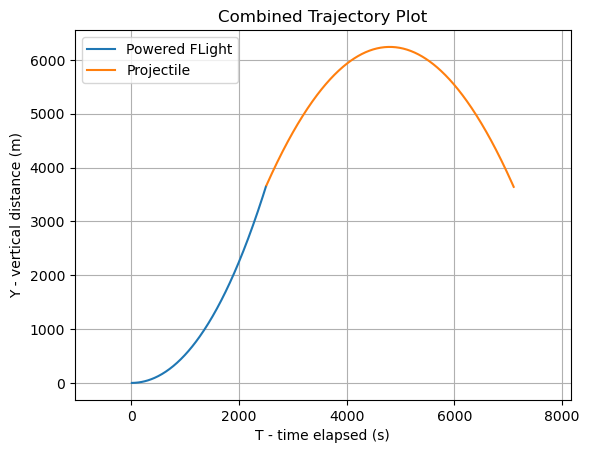

In [28]:
v0 = v # initial velocity here is taken as the velocity attained earlier
angle = 45 #launch angle
angle_radians = np.radians(angle)
ang_acc = np.radians(90) # direction of gravity

v0x = v0 * np.cos(angle_radians)
v0y = v0 * np.sin(angle_radians)

total_time = t_max + (2 * v0y) / g # total trajectory time

t1 = t_max
dt1 = 0.1

x1 = 0 
y1 = y 

x1_list = []
y1_list = []
t1_list = []

while t1 <= total_time :
    
    dx1 = 0.5 * (- g) * np.cos(ang_acc) * (dt1**2)
    dy1 = 0.5 * (- g) * np.sin(ang_acc) * (dt1**2) 
    
    dvx = - g * np.cos(ang_acc) * dt1
    dvy = - g * np.sin(ang_acc) * dt1
    
    x1 = x1 + (v0x * dt1) + dx1
    y1 = y1 + (v0y * dt1) + dy1
    v0x = v0x + dvx
    v0y = v0y + dvy
    t1 = t1 + dt1
    
    x1_list.append(x1)
    y1_list.append(y1)
    t1_list.append(t1 * 100)

def plot_trajectory(t_list, y_list, t1_list, y1_list) :
    plt.plot(t_list, y_list, label="Powered FLight")
    plt.plot(t1_list, y1_list, label="Projectile")
    plt.title("Combined Trajectory Plot")
    plt.xlabel("T - time elapsed (s)")
    plt.ylabel("Y - vertical distance (m)")
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()
plot_trajectory(t_list, y_list, t1_list, y1_list)